In [717]:
import os
import random
import pandas as pd
import numpy as np
import gc


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.5f}'.format


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42)

In [718]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [719]:
# 초기 1회만 수행
csv_to_parquet("C:/Users/user/Desktop/데이콘/현대/open(수정)/train.csv", 'train')
csv_to_parquet("C:/Users/user/Desktop/데이콘/현대/open(수정)/test.csv", 'test')

train Done.
test Done.


In [720]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
train

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.88102,2018-12-17 21:29,Z618338,30.00000,24,24300,...,180.00000,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.00262,3.45000
1,TRAIN_000001,IN,UJM2,Bulk,0.00000,2014-09-23 6:59,X886125,30.00000,13,35900,...,180.00000,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.00022,0.00000
2,TRAIN_000002,CN,EUC8,Container,0.00000,2015-02-03 22:00,T674582,50.00000,12,146000,...,370.00000,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.00161,0.00000
3,TRAIN_000003,JP,ZAG4,Container,0.00000,2020-01-17 4:02,Y847238,20.00000,18,6910,...,120.00000,PBZV77,Bahamas,-3.18000,-1.61000,6.70000,2.62935,13,0.00036,0.00000
4,TRAIN_000004,SG,GIW5,Container,27.03765,2020-01-26 7:51,A872328,50.00000,10,116000,...,300.00000,GUCE76,Liberia,-0.33000,-3.28000,25.60000,2.49595,15,0.00262,253.55444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,Container,0.00000,2017-06-06 5:02,Y375615,20.00000,27,6820,...,110.00000,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.00055,0.00000
391935,TRAIN_391935,SG,GIW5,Bulk,5.88460,2019-10-16 0:36,K635567,10.00000,12,3160,...,80.00000,JLTM64,Vietnam,-0.66000,0.97000,27.30000,1.25349,8,0.00262,144.06139
391936,TRAIN_391936,US,QGN3,Bulk,70.66024,2021-03-23 22:35,J284147,30.00000,8,60300,...,200.00000,YERJ68,Singapore,-3.44000,7.99000,21.10000,4.76626,18,0.00016,41.48222
391937,TRAIN_391937,TW,JWI3,Container,9.44818,2015-01-08 7:15,J644215,30.00000,29,23800,...,170.00000,HCZK58,Comoros,NaN,NaN,NaN,NaN,15,0.00099,7.48528


In [721]:
train.isna().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [722]:
train.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
count,391939.00000,391938.00000,391939.00000,391939.00000,391938.00000,391938.00000,391939.00000,391938.00000,228251.00000,228251.00000,227309.00000,228251.00000,391939.00000,391939.00000,391939.00000
mean,19.32819,30.55001,14.74799,63577.50678,16.47618,11.08811,41348.96867,205.12132,-0.29491,-0.26385,18.86297,2.70699,11.84158,0.00088,61.94083
std,30.93006,10.95707,7.04399,63515.53102,6.04593,4.59930,39304.54366,75.87389,3.36659,3.73695,9.72998,1.38803,6.64411,0.00084,170.80956
min,0.00000,10.00000,0.00000,100.00000,0.00000,0.00000,150.00000,20.00000,-25.33000,-21.45000,-32.20000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,20.00000,10.00000,14300.00000,10.00000,10.00000,10000.00000,150.00000,-2.15000,-2.28000,12.20000,1.80525,7.00000,0.00014,0.00000
50%,6.92968,30.00000,13.00000,47400.00000,20.00000,10.00000,30700.00000,190.00000,-0.13000,0.00000,21.60000,2.61806,12.00000,0.00055,7.94444
75%,25.69283,40.00000,18.00000,81500.00000,20.00000,10.00000,52100.00000,260.00000,1.54000,2.00000,26.60000,3.55624,17.00000,0.00161,49.17611
max,199.98065,60.00000,80.00000,404000.00000,30.00000,20.00000,237000.00000,400.00000,17.91000,29.69000,47.60000,11.17966,23.00000,0.00262,2159.13056


<AxesSubplot:>

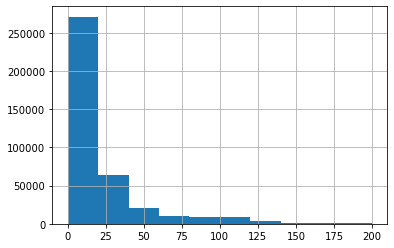

In [723]:
train['DIST'].hist()

In [724]:
train.groupby('ARI_CO')['CI_HOUR'].mean()

ARI_CO
AU    98.05939
BR   166.40628
CA    77.61455
CL   112.94241
CN    46.10447
FI    56.46198
ID    61.38497
IN    50.33820
JP    42.95683
KR    27.17722
LV    45.30576
MY    66.22710
MZ    85.39858
PE    94.30076
PH    18.65876
QA    51.13844
RU    92.27939
SG   109.03158
TT    66.11549
TW    22.43506
UA   108.14341
US    64.38862
VE   132.81664
VN    69.55111
ZA    80.81274
Name: CI_HOUR, dtype: float64

In [725]:
train['ARI_CO'].value_counts()

ARI_CO
CN    141743
JP     52752
SG     43865
AU     32853
TW     32616
IN     16192
RU     14383
CA     10890
KR     10644
BR      9374
ID      5863
US      4420
UA      3363
LV      2140
MZ      2122
QA      1809
ZA      1667
VN      1581
TT      1188
PE       904
MY       856
CL       267
FI       257
VE        97
PH        93
Name: count, dtype: int64

## 중복없음

In [726]:
train[train.duplicated(keep=False)]

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR


### 데이터 정의
- ARI_CO = 도착항의 소속국가(도착항 앞 2글자) - 범주형
- ARI_PO = 도착항의 항구명 (도착항 뒤 글자) 범주형
- SHIP_TYPE_CATEGORY = 선종 통합 바탕으로 5대 선종으로 분류(4개) - 범주형
- DIST = 정박지(ber_port)와 접인지 사이의 거리 - 연속형
- ATA = anc_port에 도착한 시점의 utc.실제 정박 시각(Actual Time of Arrival) - datetime
- BREADTH = 선박의 폭 - 범주형
- BUILT = 선박의 연령 - 범주형
- DEADWEIGHT = 선박의 재화중량톤수 - 연속형
- DEPTH = 선박의 깊이 - 범주형
- DRAUGHT = 홀수 높이 - 범주형
- GT = 용적톤수(Gross Tonnage)값 - 연속형
- LENGTH = 선박의 길이 - 연속형
- SHIPMANAGER = 선박 소유주 - 범주형
- FLAG = 선박의 국적 - 범주형
- U_WIND = 풍향 u벡터 - 연속형
- V_WIND = 풍향 v벡터 - 연속형
- AIR_TEMPERATURE = 기온 - 연속형
- BN = 보퍼트 풍력 계급 - 범주형
- ATA_LT = anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)(단위 : H) - 연속형
- PORT_SIZE = 접인지 폴리곤 영역의 크기 - 연속형

## 기상관련변수
- U_WIND (풍속)
- V_WIND (풍속)
- ATA변수 (year, month, hour, day, minute, weekday,weekend)
- wind_speed 
- BN (B) 
- B
- AIR_TEMPERATURE

## 지리관련변수
- DIST 

## 선박관련변수
- ID
- BREADTH
- DEADWEIGHT
- BUILT
- DEPTH
- DRAUGHT
- GT
- LENGTH
- SHIPMANAGER
- FLAG
- PORT_SIZE
- SHIP_TYPE_CATEGORY
- CI_HOUR (CI)

## 항구관련함수
- ARI_CO
- ARI_PO
- PORT_SIZE

### ATA변수 datetime으로 변환 후 year, month, day, hour, minute, weekday 파생변수 생성
### 'BERADTH', 'DEPTH', 'DRAUGHT', 'LENGTH' 결측치는 데이터 하나에 존재 -> 제거

In [727]:
train.drop(356484,axis=0,inplace=True)

## 노이즈 데이터 
- utc 시간 기준으로 같은 국가, 같은 항구, 같은 시간일 때 풍향, 기온이 다른 데이터 제거
- 혹은 결측치로 대체 후 결측치와 함께 처리

In [728]:
# 'ARI_CO', 'ARI_PO', 'ATA' 별로 'U_WIND','V_WIND','AIR_TEMPERATURE'열의 고유한 값 수를 계산합니다.
unique_counts = train.groupby(['ARI_CO', 'ARI_PO', 'ATA'])[['U_WIND','V_WIND','AIR_TEMPERATURE']].nunique()
# 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열 중에서 고유한 값 수가 1보다 큰 행을 필터링합니다.
filtered_data = unique_counts[(unique_counts['U_WIND'] > 1) |(unique_counts['V_WIND'] > 1) |(unique_counts['AIR_TEMPERATURE'] > 1)] 
# 고유한 값 수가 1보다 큰 그룹의 인덱스 추출
filtered_indices = filtered_data.index
# 'ARI_CO', 'ARI_PO', 'ATA'가 필터링된 인덱스에 포함되지 않는 행만 선택하여 새로운 데이터프레임 생성
train = train[~train.set_index(['ARI_CO', 'ARI_PO', 'ATA']).index.isin(filtered_indices)]

# ATA 
- ATA datetime으로 변환
- year, month, day, minute,weekday 파생변수 생성

In [729]:
# 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성
new_train = train.copy()
# 새로운 데이터프레임에 작업 수행
new_train['ATA'] = pd.to_datetime(new_train['ATA'])
# 새로운 데이터프레임을 원본 데이터프레임에 할당
train = new_train

# datetime을 여러 파생 변수로 변환
# 토요일5, 일요일 6
for df in [train]:
    df['year'] = df['ATA'].dt.year
    df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    

In [730]:
# 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성
new_test = test.copy()
# 새로운 데이터프레임에 작업 수행
new_test['ATA'] = pd.to_datetime(new_test['ATA'])
# 새로운 데이터프레임을 원본 데이터프레임에 할당
test = new_test
# datetime을 여러 파생 변수로 변환
for df in [test]:
    df['year'] = df['ATA'].dt.year
    df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# 결측치 처리
#### 20년 이후 데이터는 결측치 없음. 18년 이전데이터는 모두 결측치 . 18년 19년은 있는 것도 있고 없는 것도 있음.
- MIce

## 인코딩 먼저해야 Mice 가능

In [731]:
X = train.copy()

In [732]:
import pandas as pd

# 'SHIP_TYPE_CATEGORY' 변수에 대해 원핫인코딩 적용
X = pd.get_dummies(X, columns=['SHIP_TYPE_CATEGORY'],drop_first=False)
test = pd.get_dummies(test, columns=['SHIP_TYPE_CATEGORY'],drop_first=False)
#X_val = pd.get_dummies(X_val, columns=['SHIP_TYPE_CATEGORY'],drop_first=True)
#X_train

In [733]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import bisect
# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

Encoding features: 100%|█████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  5.00it/s]


In [734]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 모델 생성
imputer = IterativeImputer(max_iter=10, random_state=0)

# 'ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열을 포함한 열들 선택
selected_columns = ['ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE']
data_for_imputation = X[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.fit_transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
X[selected_columns] = imputed_data

# train 데이터프레임에 결측치가 없는지 확인
X.isna().sum()


SAMPLE_ID                            0
ARI_CO                               0
ARI_PO                               0
DIST                                 0
ATA                                  0
ID                                   0
BREADTH                              0
BUILT                                0
DEADWEIGHT                           0
DEPTH                                0
DRAUGHT                              0
GT                                   0
LENGTH                               0
SHIPMANAGER                          0
FLAG                                 0
U_WIND                               0
V_WIND                               0
AIR_TEMPERATURE                      0
BN                              163688
ATA_LT                               0
PORT_SIZE                            0
CI_HOUR                              0
year                                 0
Quarter                              0
month                                0
day                      

In [735]:
train = X.copy()

In [736]:
# 'ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열을 포함한 열들 선택
selected_columns = ['ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE']
data_for_imputation = test[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
test[selected_columns] = imputed_data

# train 데이터프레임에 결측치가 없는지 확인
test.isna().sum()

SAMPLE_ID                           0
ARI_CO                              0
ARI_PO                              0
DIST                                0
ATA                                 0
ID                                  0
BREADTH                             0
BUILT                               0
DEADWEIGHT                          0
DEPTH                               0
DRAUGHT                             0
GT                                  0
LENGTH                              0
SHIPMANAGER                         0
FLAG                                0
U_WIND                              0
V_WIND                              0
AIR_TEMPERATURE                     0
BN                              91725
ATA_LT                              0
PORT_SIZE                           0
year                                0
Quarter                             0
month                               0
day                                 0
hour                                0
minute      

In [737]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387636 entries, 0 to 391938
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   SAMPLE_ID                     387636 non-null  object        
 1   ARI_CO                        387636 non-null  float64       
 2   ARI_PO                        387636 non-null  float64       
 3   DIST                          387636 non-null  float64       
 4   ATA                           387636 non-null  datetime64[ns]
 5   ID                            387636 non-null  int32         
 6   BREADTH                       387636 non-null  float64       
 7   BUILT                         387636 non-null  int64         
 8   DEADWEIGHT                    387636 non-null  int64         
 9   DEPTH                         387636 non-null  float64       
 10  DRAUGHT                       387636 non-null  float64       
 11  GT                

In [738]:
# 자료형 변환 (float --> int)
cols0 = ['ARI_CO','ARI_PO','year','month','hour']
train[cols0] = train[cols0].astype("int32")

# 자료형 변환 (int --> float)
cols = ['BUILT','DEADWEIGHT','GT']
train[cols] = train[cols].astype("float64")

In [739]:
# 자료형 변환 (float --> int)
cols0 = ['ARI_CO','ARI_PO','year','month','hour']
test[cols0] = test[cols0].astype("int32")

# 자료형 변환 (int --> float)
cols = ['BUILT','DEADWEIGHT','GT']
test[cols] = test[cols].astype("float64")

# 파생변수 생성식

## 풍속계산

In [740]:
import numpy as np
train['wind_speed'] = np.sqrt(train['U_WIND']**2 + train['V_WIND']**2)
test['wind_speed'] = np.sqrt(test['U_WIND']**2 + test['V_WIND']**2)

# 보퍼트 계급 식 : 풍속 = 0.836 * (BN) **(3/2)

In [741]:
# 'WIND_SPEED'를 기반으로 'BN' 변수의 결측치 채우기
train['BN'].fillna((train['wind_speed'] / 0.836) ** (2/3), inplace=True)
test['BN'].fillna((test['wind_speed'] / 0.836) ** (2/3), inplace=True)
# 결과 확인
train.isnull().sum()


SAMPLE_ID                       0
ARI_CO                          0
ARI_PO                          0
DIST                            0
ATA                             0
ID                              0
BREADTH                         0
BUILT                           0
DEADWEIGHT                      0
DEPTH                           0
DRAUGHT                         0
GT                              0
LENGTH                          0
SHIPMANAGER                     0
FLAG                            0
U_WIND                          0
V_WIND                          0
AIR_TEMPERATURE                 0
BN                              0
ATA_LT                          0
PORT_SIZE                       0
CI_HOUR                         0
year                            0
Quarter                         0
month                           0
day                             0
hour                            0
minute                          0
weekday                         0
SHIP_TYPE_CATE

# ATA변수 현지시간으로 바꾸기 
- year, month, day, minute,weekday 파생변수 생성
- ATA_LT를 hour값으로 사용 -> 왜냐하면 같은 항구지만 시간차가 다른경우가 존재. 1~2시간 차이기 때문에 hour은 ATA_LT로 기존 변수의 시간으로 하기로함
- weekend 파생변수 생성 -> weekday값이 5,6 이면 weekend = 1 else = 0.

In [742]:
conditions = [
    (train['ARI_CO'] == 'CN'),  # 'CN'인 경우 8시간 추가
    (train['ARI_CO'] == 'JP'),  # 'JP'인 경우 9시간 추가
    (train['ARI_CO'] == 'RU'),  # 'RU'인 경우 2시간 추가
    (train['ARI_CO'] == 'AU'),  # 'AU'인 경우 11시간 추가
    (train['ARI_CO'] == 'SG'),  # 'SG'인 경우 8시간 추가
    (train['ARI_CO'] == 'ZA'),  # 'ZA'인 경우 2시간 추가
    (train['ARI_CO'] == 'KR'),  # 'KR'인 경우 9시간 추가
    (train['ARI_CO'] == 'TW'),  # 'TW'인 경우 8시간 추가
    (train['ARI_CO'] == 'TT'),  # 'TT'인 경우 -4시간 추가
    (train['ARI_CO'] == 'ID'),  # 'ID'인 경우 7시간 추가
    (train['ARI_CO'] == 'BR'),  # 'BR'인 경우 -2시간 추가
    (train['ARI_CO'] == 'QA'),  # 'QA'인 경우 3시간 추가
    (train['ARI_CO'] == 'LV'),  # 'LV'인 경우 3시간 추가
    (train['ARI_CO'] == 'MZ'),  # 'MZ'인 경우 2시간 추가
    (train['ARI_CO'] == 'US'),  # 'US'인 경우 -4시간 추가
    (train['ARI_CO'] == 'IN'),  # 'IN'인 경우 5.5시간 추가
    (train['ARI_CO'] == 'UA'),  # 'UA'인 경우 3시간 추가
    (train['ARI_CO'] == 'CA'),  # 'CA'인 경우 -2.5시간 추가
    (train['ARI_CO'] == 'MY'),  # 'MY'인 경우 8시간 추가
    (train['ARI_CO'] == 'PE'),  # 'PE'인 경우 -5시간 추가
    (train['ARI_CO'] == 'VN'),  # 'VN'인 경우 7시간 추가
    (train['ARI_CO'] == 'FI'),  # 'FI'인 경우 3시간 추가
    (train['ARI_CO'] == 'CL'),  # 'CL'인 경우 -3시간 추가
    (train['ARI_CO'] == 'VE'),  # 'VE'인 경우 -4시간 추가
    (train['ARI_CO'] == 'PH')   # 'PH'인 경우 8시간 추가
]

choices = [
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=9),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=11),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=9),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=7),
    train['ATA'] + pd.Timedelta(hours=-2),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=5.5),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=-2.5),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=-5),
    train['ATA'] + pd.Timedelta(hours=7),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=-3),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=8)
]

train['ATA'] = np.select(conditions, choices, default=train['ATA'])

# datetime을 여러 파생 변수로 변환
# 토요일5, 일요일 6
for df in [train]:
    df['year'] = df['ATA'].dt.year
    df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    
train['hour']=train['ATA_LT']
train.drop('ATA_LT',axis=1,inplace=True)
train['weekend'] = train['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

In [743]:
test['ATA'] = pd.to_datetime(test['ATA'])

conditions = [
    (test['ARI_CO'] == 'CN'),  # 'CN'인 경우 8시간 추가
    (test['ARI_CO'] == 'JP'),  # 'JP'인 경우 9시간 추가
    (test['ARI_CO'] == 'RU'),  # 'RU'인 경우 2시간 추가
    (test['ARI_CO'] == 'AU'),  # 'AU'인 경우 11시간 추가
    (test['ARI_CO'] == 'SG'),  # 'SG'인 경우 8시간 추가
    (test['ARI_CO'] == 'ZA'),  # 'ZA'인 경우 2시간 추가
    (test['ARI_CO'] == 'KR'),  # 'KR'인 경우 9시간 추가
    (test['ARI_CO'] == 'TW'),  # 'TW'인 경우 8시간 추가
    (test['ARI_CO'] == 'TT'),  # 'TT'인 경우 -4시간 추가
    (test['ARI_CO'] == 'ID'),  # 'ID'인 경우 7시간 추가
    (test['ARI_CO'] == 'BR'),  # 'BR'인 경우 -2시간 추가
    (test['ARI_CO'] == 'QA'),  # 'QA'인 경우 3시간 추가
    (test['ARI_CO'] == 'LV'),  # 'LV'인 경우 3시간 추가
    (test['ARI_CO'] == 'MZ'),  # 'MZ'인 경우 2시간 추가
    (test['ARI_CO'] == 'US'),  # 'US'인 경우 -4시간 추가
    (test['ARI_CO'] == 'IN'),  # 'IN'인 경우 5.5시간 추가
    (test['ARI_CO'] == 'UA'),  # 'UA'인 경우 3시간 추가
    (test['ARI_CO'] == 'CA'),  # 'CA'인 경우 -2.5시간 추가
    (test['ARI_CO'] == 'MY'),  # 'MY'인 경우 8시간 추가
    (test['ARI_CO'] == 'PE'),  # 'PE'인 경우 -5시간 추가
    (test['ARI_CO'] == 'VN'),  # 'VN'인 경우 7시간 추가
    (test['ARI_CO'] == 'FI'),  # 'FI'인 경우 3시간 추가
    (test['ARI_CO'] == 'CL'),  # 'CL'인 경우 -3시간 추가
    (test['ARI_CO'] == 'VE'),  # 'VE'인 경우 -4시간 추가
    (test['ARI_CO'] == 'PH')   # 'PH'인 경우 8시간 추가
]

choices = [
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=9),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=11),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=9),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=7),
    test['ATA'] + pd.Timedelta(hours=-2),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=5.5),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=-2.5),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=-5),
    test['ATA'] + pd.Timedelta(hours=7),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=-3),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=8)
]

test['ATA'] = np.select(conditions, choices, default=test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [test]:
    df['year'] = df['ATA'].dt.year
    df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    
    
test['hour']=test['ATA_LT']
test.drop('ATA_LT',axis=1,inplace=True)
test['weekend'] = test['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

### 기온,기상 관련변수

In [744]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387636 entries, 0 to 391938
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   SAMPLE_ID                     387636 non-null  object        
 1   ARI_CO                        387636 non-null  int32         
 2   ARI_PO                        387636 non-null  int32         
 3   DIST                          387636 non-null  float64       
 4   ATA                           387636 non-null  datetime64[ns]
 5   ID                            387636 non-null  int32         
 6   BREADTH                       387636 non-null  float64       
 7   BUILT                         387636 non-null  float64       
 8   DEADWEIGHT                    387636 non-null  float64       
 9   DEPTH                         387636 non-null  float64       
 10  DRAUGHT                       387636 non-null  float64       
 11  GT                

In [745]:
# 평균 풍향벡터 변수 생성
train['Average_WIND'] = train[['U_WIND', 'V_WIND']].mean(axis=1)

# 풍향벡터 변동성 변수 생성
train['WIND_Volatility'] = train[['U_WIND', 'V_WIND']].std(axis=1)


# 달별 풍향 변수 생성
monthly_WIND = train.groupby('month').agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
train = train.merge(monthly_WIND, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 풍향 변수 생성
quarterly_WIND = train.groupby(['year', 'Quarter']).agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
train = train.merge(quarterly_WIND, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

# 달별 기온 변수 생성
monthly_AIR_TEMPERATURE = train.groupby('month').agg({'AIR_TEMPERATURE': 'mean'})
train = train.merge(monthly_AIR_TEMPERATURE, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 기온 변수 생성
quarterly_AIR_TEMPERATURE = train.groupby(['year', 'Quarter']).agg({'AIR_TEMPERATURE': 'mean'})
train = train.merge(quarterly_AIR_TEMPERATURE, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

In [746]:
# 평균 풍향벡터 변수 생성
test['Average_WIND'] = test[['U_WIND', 'V_WIND']].mean(axis=1)

# 풍향벡터 변동성 변수 생성
test['WIND_Volatility'] = test[['U_WIND', 'V_WIND']].std(axis=1)


# 달별 풍향 변수 생성
monthly_WIND = test.groupby('month').agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
test = test.merge(monthly_WIND, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 풍향 변수 생성
quarterly_WIND = test.groupby(['year', 'Quarter']).agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
test = test.merge(quarterly_WIND, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

# 달별 기온 변수 생성
monthly_AIR_TEMPERATURE = test.groupby('month').agg({'AIR_TEMPERATURE': 'mean'})
test = test.merge(monthly_AIR_TEMPERATURE, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 기온 변수 생성
quarterly_AIR_TEMPERATURE = test.groupby(['year', 'Quarter']).agg({'AIR_TEMPERATURE': 'mean'})
test = test.merge(quarterly_AIR_TEMPERATURE, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

In [747]:
#평균기온, 최대기온 변수
def calculate_day_values(dataframe, target_column, output_column, aggregation_func):
    result_dict = {}

    grouped_temp = dataframe.groupby(['ARI_PO', 'month', 'day'])[target_column].agg(aggregation_func)

    for (ARI, month, day), value in grouped_temp.items():
        result_dict.setdefault(ARI, {}).setdefault(month, {})[day] = value

    dataframe[output_column] = [
        result_dict.get(row['ARI_PO'], {}).get(row['month'], {}).get(row['day'], None)
        for _, row in dataframe.iterrows()
    ]

    
train['day_max_AIR_TEMPERATURE'] = 0.0
train['day_mean_AIR_TEMPERATURE'] = 0.0

calculate_day_values(train, 'AIR_TEMPERATURE', 'day_max_AIR_TEMPERATURE', 'max')
calculate_day_values(train, 'AIR_TEMPERATURE', 'day_mean_AIR_TEMPERATURE', 'mean')
calculate_day_values(train, 'AIR_TEMPERATURE', 'day_min_AIR_TEMPERATURE', 'min')

train['day_AIR_TEMPERATURE_range'] = train['day_max_AIR_TEMPERATURE'] - train['day_min_AIR_TEMPERATURE']

calculate_day_values(test, 'AIR_TEMPERATURE', 'day_max_AIR_TEMPERATURE', 'max')
calculate_day_values(test, 'AIR_TEMPERATURE', 'day_mean_AIR_TEMPERATURE', 'mean')
calculate_day_values(test, 'AIR_TEMPERATURE', 'day_min_AIR_TEMPERATURE', 'min')

test['day_AIR_TEMPERATURE_range'] = test['day_max_AIR_TEMPERATURE'] - test['day_min_AIR_TEMPERATURE']


In [748]:
#월
train['sin_month'] = -np.sin(2 * np.pi * train['month']/12.0)
train['cos_month'] = -np.cos(2 * np.pi * train['month']/12.0)
test['sin_month'] = -np.sin(2 * np.pi * test['month']/12.0)
test['cos_month'] = -np.cos(2 * np.pi * test['month']/12.0)

#평일
train['sin_weekday'] = -np.sin(2 * np.pi * train['weekday']/5.0)
train['cos_weekday'] = -np.cos(2 * np.pi * train['weekday']/5.0)
test['sin_weekday'] = -np.sin(2 * np.pi * test['weekday']/5.0)
test['cos_weekday'] = -np.cos(2 * np.pi * test['weekday']/5.0)

In [714]:
# 냉방항구 변수
def CDH(xs):
    cumsum = np.cumsum(xs - 26)
    return np.concatenate((cumsum[:11], cumsum[11:] - cumsum[:-11]))

def calculate_and_add_cdh(dataframe):
    cdhs = []
    for i in range(0, 104):
        temp = dataframe[dataframe['ARI_PO'] == i]['AIR_TEMPERATURE'].values
        cdh = CDH(temp)
        cdhs.append(cdh)
    return np.concatenate(cdhs)

train['CDH'] = calculate_and_add_cdh(train)
test['CDH'] = calculate_and_add_cdh(test)

ValueError: Length of values (220463) does not match length of index (220491)

In [749]:
#WCT(체감온도)변수
train['WCT'] = 13.12 + 0.6125*train['AIR_TEMPERATURE'] - 11.37*(train['wind_speed']**
                                                            0.16) + 0.3965*(train['wind_speed']**0.16)*train['AIR_TEMPERATURE']
test['WCT'] = 13.12 + 0.6125*test['AIR_TEMPERATURE'] - 11.37*(test['wind_speed']**
                                                            0.16) + 0.3965*(test['wind_speed']**0.16)*test['AIR_TEMPERATURE']

## 대기시간 통계량 변수

In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387636 entries, 0 to 387635
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   SAMPLE_ID                  387636 non-null  object        
 1   ARI_CO                     387636 non-null  int32         
 2   ARI_PO                     387636 non-null  int32         
 3   SHIP_TYPE_CATEGORY         387636 non-null  int32         
 4   DIST                       387636 non-null  float64       
 5   ATA                        387636 non-null  datetime64[ns]
 6   ID                         387636 non-null  int32         
 7   BREADTH                    387636 non-null  float64       
 8   BUILT                      387636 non-null  float64       
 9   DEADWEIGHT                 387636 non-null  float64       
 10  DEPTH                      387636 non-null  float64       
 11  DRAUGHT                    387636 non-null  float64 

In [ ]:
# Calculate 'month_day_mean'
cihour_mean = pd.pivot_table(train, values='CI_HOUR', index=['ARI_PO','month','day'], aggfunc=np.mean).reset_index()
cihour_mean.columns = ['ARI_PO', 'month', 'day', 'month_day_mean']

# Calculate 'month_day_std'
cihour_std = pd.pivot_table(train, values='CI_HOUR', index=['ARI_PO','month','day'], aggfunc=np.std).reset_index()
cihour_std.columns = ['ARI_PO','month',  'day', 'month_day_std']

# Calculate 'Quarter_mean'
cihour_quarter_mean = pd.pivot_table(train, values='CI_HOUR', index=['ARI_PO', 'Quarter'], aggfunc=np.mean).reset_index()
cihour_quarter_mean.columns = ['ARI_PO', 'Quarter', 'Quarter_mean']

# Calculate 'QUARTER_std'
cihour_quarter_std = pd.pivot_table(train, values='CI_HOUR', index=['ARI_PO', 'Quarter'], aggfunc=np.std).reset_index()
cihour_quarter_std.columns = ['ARI_PO', 'Quarter', 'Quarter_mean']

# Merge calculated features to 'train' and 'test' dataframes
train = train.merge(cihour_mean, on=['ARI_PO', 'month','day'], how='left')
test = test.merge(cihour_mean, on=['ARI_PO','month','day'], how='left')

train = train.merge(cihour_std, on=['ARI_PO', 'month','day'], how='left')
test = test.merge(cihour_std, on=['ARI_PO', 'month','day'], how='left')

train = train.merge(cihour_quarter_mean, on=['ARI_PO', 'Quarter'], how='left')
test = test.merge(cihour_quarter_mean, on=['ARI_PO', 'Quarter'], how='left')

train = train.merge(cihour_quarter_std, on=['ARI_PO', 'Quarter'], how='left')
test = test.merge(cihour_quarter_std, on=['ARI_PO', 'Quarter'], how='left')

train = train.reset_index(drop=True)

In [341]:
test.isna().sum()

SAMPLE_ID                       0
ARI_CO                          0
ARI_PO                          0
SHIP_TYPE_CATEGORY              0
DIST                            0
ATA                             0
ID                              0
BREADTH                         0
BUILT                           0
DEADWEIGHT                      0
DEPTH                           0
DRAUGHT                         0
GT                              0
LENGTH                          0
SHIPMANAGER                     0
FLAG                            0
U_WIND                          0
V_WIND                          0
AIR_TEMPERATURE                 0
BN                              0
PORT_SIZE                       0
year                            0
Quarter                         0
month                           0
day                             0
hour                            0
minute                          0
weekday                         0
wind_speed                      0
weekend       

## 클러스터링

In [ ]:
#def elbox(X):
#    sse = []
#    for i in range(1,11)
#        km = KMeans(n_clusters=i, init='k-means++')
#        km.fit(X)
#        sse.append(km.inertia_)
#    
#    plt.plot(range(1,11), sse, marker='o')
#    plt.xlabel('클러스터개수')
#    plt.ylabel('SSE')
#    plt.show()
#    
#elbow(X)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib

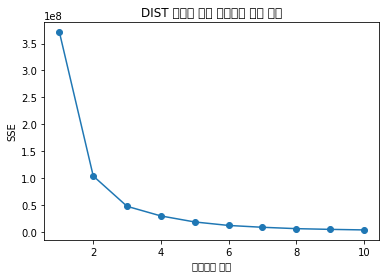

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current

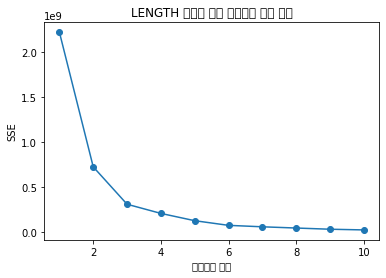

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current

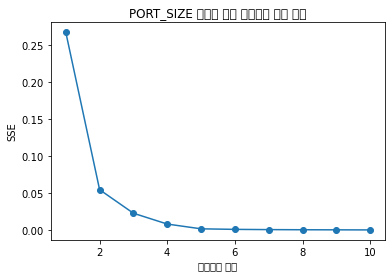

In [393]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(X, variable_name):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++')
        km.fit(X[[variable_name]])
        sse.append(km.inertia_)

    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.title(f'{variable_name} 변수에 대한 클러스터 개수 결정')
    plt.show()

# 다양한 변수에 대해 elbow 함수 호출
variables_to_cluster = ['DIST', 'LENGTH', 'PORT_SIZE']

for variable in variables_to_cluster:
    elbow(train, variable)


In [750]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10)
train['dist_cls'] = km.fit_predict(train[['DIST']])
test['dist_cls'] = km.predict(test[['DIST']])

In [646]:
train.groupby('ARI_PO')['CI_HOUR'].mean()

ARI_PO
0      42.87486
1      79.00876
2      92.64326
3      34.29749
4      96.59496
         ...   
98     90.29459
99    187.55244
100    94.90749
101    45.23675
102   207.62355
Name: CI_HOUR, Length: 103, dtype: float64

### 이상치 처리 iso

In [751]:
train.drop(['SAMPLE_ID','ATA'],axis=1,inplace=True)

In [752]:
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성
isol = IsolationForest(contamination=0.05)  # contamination 비율은 이상치 비율
isol.fit(train)

# 훈련 데이터에서 이상치 여부 판별
outlier_predictions_train = isol.predict(train)

# 테스트 데이터에서 이상치 여부 판별

# 이상치로 판별된 데이터 제거
train= train[outlier_predictions_train == 1]

# 제거된 이상치로 인해 줄어든 훈련 데이터 크기를 확인
print("훈련 데이터 크기 (이상치 제거 후):", train.shape)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


훈련 데이터 크기 (이상치 제거 후): (368254, 50)


# ----클러스터링후 나누고 모델링 해보기 -----------------------

In [557]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb  
X = train.drop('CI_HOUR',axis=1)
y = train['CI_HOUR']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# 데이터셋을 학습용과 검증용으로 분할
y = np.log1p(y)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2)

In [565]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Best hyperparameters
best_params = {
    'n_estimators': 500,  # 나머지 하이퍼파라미터는 ExtraTreesRegressor에 해당하는 파라미터로 변경해야합니다.
    'max_features': 0.9,
    'min_samples_split': 3,
    'min_samples_leaf': 1,
    'bootstrap': True
}

# ExtraTreesRegressor 모델 생성
model = ExtraTreesRegressor(n_estimators=best_params['n_estimators'],
                            max_features=best_params['max_features'],
                            min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            bootstrap=best_params['bootstrap'],
                            random_state=42)

# 모델을 훈련 데이터로 학습
model.fit(X_train, Y_train)

# 검증 데이터에 대한 예측값 계산
predictions = model.predict(X_val)
# 예측값을 0 이상으로 조정
predictions = [max(0, value) for value in predictions]

# MAE 계산
mae = mean_absolute_error(Y_val, predictions)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.48771152052418615


In [566]:
#test데이터 예측
x_test = test.drop(columns=['SAMPLE_ID', 'ATA'], axis=1)
pred_test=model.predict(x_test)
pred_test = [max(0, value) for value in pred_test]
pred_exp_test = np.expm1(pred_test)
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_test
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/엑스트라.csv", index=False)

In [753]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb  
train_x = train.drop('CI_HOUR',axis=1)
train_y = train['CI_HOUR']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# 데이터셋을 학습용과 검증용으로 분할

X_train, X_test, y_train, y_test  = train_test_split(train_x, train_y, test_size=0.2)

In [754]:
def mae(y, pred):
    return np.mean(abs(y-pred))

In [ ]:
ARI_POs = train['ARI_PO'].unique()

In [ ]:
models = {}

for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)

    # 모델 선언
    PO_model = xgb.XGBRegressor(random_state=42)

    # Train
    PO_model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models[ARI_PO] = PO_model

models

In [ ]:
mae_scores = {}

all_actual = []
all_predicted = []

# 항구별 MAE, 전체 MAE
for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # 모델 선언
    PO_model = models[ARI_PO]

    # predictions 생성
    y_pred_PO = PO_model.predict(X_test_PO)
    # 예측값을 0 이상으로 조정
    y_pred_PO = [max(0, value) for value in y_pred_PO]
    
    #  항구별 MAE
    mae_Po = mae(y_test_PO, y_pred_PO)
    mae_scores[ARI_PO] = mae_Po

    # MAE 측정을 위한 데이터 생성
    all_actual.extend(y_test_PO)
    all_predicted.extend(y_pred_PO)

# 전체 MAE 계산
overall_mae = mae(np.array(all_actual), np.array(all_predicted))

mae_scores, overall_mae

In [ ]:
param_grid = {
    'n_estimators': [400, 800],
    'max_depth': [7, 10],
    'subsample': [0.8, 0.9],  #sp_uniform(loc=0.8, scale=0.2)
    'colsample_bytree': [0.9],  #sp_uniform(loc=0.8, scale=0.2)
    'min_child_weight': [3],
    'alpha': [3],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [ ]:
best_params = {}

In [ ]:
from sklearn.model_selection import GridSearchCV

for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 모델
    PO_model = xgb.XGBRegressor(random_state=42)

    # grid search
    grid_search = GridSearchCV(PO_model, param_grid, cv=3, n_jobs=-1, verbose=1)

    print('complete1')

    # 적용
    grid_search.fit(PO_x, PO_y)

    print('complete2')

    # best param 저장
    best_params[ARI_PO] = grid_search.best_params_

best_params

In [659]:
ARI_POs = train['ARI_PO'].unique()

In [660]:
models = {}

for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)

    # 모델 선언
    PO_model = xgb.XGBRegressor(random_state=42)

    # Train
    PO_model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models[ARI_PO] = PO_model

models

{21: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 81: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=Fa

In [661]:
mae_scores = {}

all_actual = []
all_predicted = []

# 항구별 MAE, 전체 MAE
for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # 모델 선언
    PO_model = models[ARI_PO]

    # predictions 생성
    y_pred_PO = PO_model.predict(X_test_PO)
    # 예측값을 0 이상으로 조정
    y_pred_PO = [max(0, value) for value in y_pred_PO]
    
    #  항구별 MAE
    mae_Po = mae(y_test_PO, y_pred_PO)
    mae_scores[ARI_PO] = mae_Po

    # MAE 측정을 위한 데이터 생성
    all_actual.extend(y_test_PO)
    all_predicted.extend(y_pred_PO)

# 전체 MAE 계산
overall_mae = mae(np.array(all_actual), np.array(all_predicted))

mae_scores, overall_mae

({21: 75.56317896976904,
  81: 18.943909664984144,
  14: 25.618830110452027,
  101: 12.42086220894479,
  91: 28.986580449512896,
  67: 17.935253787150817,
  35: 13.941275436434118,
  25: 8.10821023963953,
  45: 23.391852022478165,
  85: 4.047799237777042,
  74: 21.243170306288935,
  36: 15.478299056630522,
  62: 15.73306254375928,
  47: 29.53548527367107,
  28: 18.76179542922201,
  98: 18.320026186447226,
  88: 22.735380109408805,
  31: 21.152432583561147,
  69: 4.916891145176886e-06,
  100: 25.287058507910704,
  13: 18.033852522573138,
  72: 2.8515752792052473,
  41: 17.44657012054253,
  18: 28.429966117641833,
  48: 5.680438790619758,
  93: 5.080831540138787,
  95: 14.155652611941079,
  0: 9.147520292358376,
  42: 26.758862908590594,
  77: 6.165332557806193,
  71: 9.099360364799821,
  56: 23.94533457091829,
  86: 52.05963224883615,
  53: 15.77016031897202,
  39: 16.17733990466124,
  96: 13.861069529514948,
  20: 7.209930843778399,
  60: 9.145304659912306,
  15: 8.61259960664266,
  87

In [662]:
param_grid = {
    'n_estimators': [400, 800],
    'max_depth': [7, 10],
    'subsample': [0.8, 0.9],  #sp_uniform(loc=0.8, scale=0.2)
    'colsample_bytree': [0.9],  #sp_uniform(loc=0.8, scale=0.2)
    'min_child_weight': [3],
    'alpha': [3],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [663]:
best_params = {}

In [664]:
from sklearn.model_selection import GridSearchCV

for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']

    # 모델
    PO_model = xgb.XGBRegressor(random_state=42)

    # grid search
    grid_search = GridSearchCV(PO_model, param_grid, cv=3, n_jobs=-1, verbose=1)

    print('complete1')

    # 적용
    grid_search.fit(PO_x, PO_y)

    print('complete2')

    # best param 저장
    best_params[ARI_PO] = grid_search.best_params_

best_params

complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2
complete1
Fitting 3 folds fo

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


complete2
complete1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
complete2


{21: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 800,
  'subsample': 0.8},
 81: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 400,
  'subsample': 0.8},
 14: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 800,
  'subsample': 0.8},
 101: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 400,
  'subsample': 0.8},
 91: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 400,
  'subsample': 0.8},
 67: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators': 400,
  'subsample': 0.8},
 35: {'alpha': 3,
  'colsample_bytree': 0.9,
  'learning_

In [672]:
# grid search한 결과 적용하여 재학습
models_best_params = {}

mae_scores_best_params = {}

all_actual_best_params = []
all_predicted_best_params = []

# 항구별 MAE, 전체 MAE
for ARI_PO in ARI_POs:
    # 항구유형에 대한 데이터 필터링
    mask = X_train['ARI_PO'] == ARI_PO
    X_train_PO = X_train[mask]
    y_train_PO = y_train[mask]

    mask = X_test['ARI_PO'] == ARI_PO
    X_test_PO = X_test[mask]
    y_test_PO = y_test[mask]

    # 모델별 best param 적용
    model = xgb.XGBRegressor(**best_params[ARI_PO], random_state=42)

    # Train
    model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models_best_params[ARI_PO] = model

    # predictions 생성
    y_pred_PO  = model.predict(X_test_PO)

    #  항구별 MAE
    mae_score = mae(y_test_PO, y_pred_PO)
    mae_scores_best_params[ARI_PO] = mae_score

    # 전체 MAE 측정을 위한 데이터 생성
    all_actual_best_params.extend(y_test_PO)
    all_predicted_best_params.extend(y_pred_PO)

# 전체 MAE 계산
overall_mae_best_params = mae(np.array(all_actual_best_params), np.array(all_predicted_best_params))
mae_scores_best_params, overall_mae_best_params

({21: 105.69661081855074,
  81: 66.92289364505169,
  14: 44.94631348380205,
  101: 32.279179984048405,
  91: 52.522251965900814,
  67: 101.07800901297328,
  35: 24.395288096681416,
  25: 32.02911558777907,
  45: 33.507980296035,
  85: 16.63910366576448,
  74: 50.648695323211335,
  36: 63.78416224476504,
  62: 39.3347575258324,
  47: 97.3588450329898,
  28: 90.6886947528709,
  98: 54.348344026052274,
  88: 65.66097556159346,
  31: 45.24492821721609,
  69: 2.108568817320497,
  100: 55.97986462865448,
  13: 27.951819955183907,
  72: 36.20397400337942,
  41: 44.88346233710665,
  18: 94.95698016946413,
  48: 24.048794541673704,
  93: 61.71417521414394,
  95: 62.634314481174336,
  0: 29.09407289913685,
  42: 80.53268500135144,
  77: 27.865791466854137,
  71: 56.416050242595524,
  56: 106.02993387029619,
  86: 146.60683215843034,
  53: 82.44302965387082,
  39: 61.208654858730114,
  96: 38.2918717133291,
  20: 56.30291535906767,
  60: 82.93862993663127,
  15: 30.13400848084411,
  87: 61.608628

In [676]:
# test 적용 결과 확인
predictions_best_params = []

x_test = test.drop(columns=['SAMPLE_ID', 'ATA'], axis=1)

for index, row in x_test.iterrows():
    # 행에 대한 항구유형 가져오기
    ARI_PO = row['ARI_PO']

    # 모델 가져오기
    model = models_best_params[ARI_PO]

    # prediction
    prediction = model.predict(row.values.reshape(1, -1))[0]

    predictions_best_params.append(prediction)


x_test['prediction_best_params'] = predictions_best_params

KeyError: 103

In [ ]:
# array로 나온 값을 붙여넣기
sample_submission['CI_HOUR'] = predictions_best_params

# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/aripo_best.csv", index=False)

#### -------------------------

# 위 모델 test로 돌렸을 때 42나옴

## 검증데이터 나누고 해보기

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train = train.drop('CI_HOUR',axis=1)
y_train = train['CI_HOUR']

X = x_train
y = np.log1p(y_train)

# 데이터셋을 학습용과 검증용으로 분할
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3)


print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(257777, 50) (257777,)
(110477, 50) (110477,)


In [542]:
# 범주형 변수의 인덱스 저장 (캣부스트용) 
cat_cols = np.where(X_train.dtypes != np.float)[0]
cat_cols

<ipython-input-542-fbf3928a2521>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = np.where(X_train.dtypes != np.float)[0]


array([ 0,  1,  3, 11, 12, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30,
       49], dtype=int64)

In [543]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

# catboost 회귀 모델 생성
model = CatBoostRegressor(cat_features = cat_cols)

# 모델 훈련
model.fit(X_train,Y_train)


# 테스트 세트에 대한 예측
predictions = model.predict(X_val)

# 예측값을 0 이상으로 조정
predictions = [max(0, value) for value in predictions]
# MAE 계산
mae = mean_absolute_error(Y_val, predictions)

print("Mean Absolute Error (MAE):", mae)

# 예측 결과 출력
predict = pd.DataFrame({'Actual': Y_val, 'Predicted': predictions})
predict.head(10)

Learning rate set to 0.098436
0:	learn: 1.9201937	total: 365ms	remaining: 6m 4s
1:	learn: 1.7818869	total: 744ms	remaining: 6m 11s
2:	learn: 1.6605907	total: 1.04s	remaining: 5m 47s
3:	learn: 1.5536330	total: 1.34s	remaining: 5m 34s
4:	learn: 1.4620229	total: 1.67s	remaining: 5m 31s
5:	learn: 1.3833320	total: 1.99s	remaining: 5m 30s
6:	learn: 1.3147267	total: 2.34s	remaining: 5m 31s
7:	learn: 1.2558272	total: 2.68s	remaining: 5m 32s
8:	learn: 1.2046672	total: 2.99s	remaining: 5m 29s
9:	learn: 1.1614319	total: 3.35s	remaining: 5m 31s
10:	learn: 1.1257092	total: 3.64s	remaining: 5m 27s
11:	learn: 1.0944681	total: 3.96s	remaining: 5m 26s
12:	learn: 1.0678524	total: 4.34s	remaining: 5m 29s
13:	learn: 1.0460458	total: 4.71s	remaining: 5m 31s
14:	learn: 1.0278254	total: 5.15s	remaining: 5m 38s
15:	learn: 1.0126965	total: 5.51s	remaining: 5m 39s
16:	learn: 0.9992184	total: 5.82s	remaining: 5m 36s
17:	learn: 0.9881358	total: 6.14s	remaining: 5m 34s
18:	learn: 0.9788615	total: 6.48s	remaining: 

,Actual,Predicted
371364,4.56284,4.29072
251320,0.00000,0.04277
188959,2.65796,3.07908
150188,3.71287,3.78419
11775,0.00000,0.02167
192033,0.00000,0.02256
333257,0.33110,2.76995
309354,0.00000,0.00000
266179,3.38647,3.49295
340729,3.85719,4.65561


In [544]:
#test데이터 예측
x_test = test.drop(columns=['SAMPLE_ID', 'ATA'], axis=1)

pred_test=model.predict(x_test)
pred_test = [max(0, value) for value in pred_test]
pred_exp_test = np.expm1(pred_test)
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_test
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/1515.csv", index=False)

In [545]:
sample_submission

,SAMPLE_ID,CI_HOUR
0,TEST_000000,8.18299
1,TEST_000001,32.87940
2,TEST_000002,46.85808
3,TEST_000003,28.87541
4,TEST_000004,0.00000
...,...,...
220486,TEST_220486,39.71293
220487,TEST_220487,45.16469
220488,TEST_220488,32.99900
220489,TEST_220489,0.00000


## 모델학습 +optuna

In [279]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [280]:
x_train = train.drop('CI_HOUR',axis=1)
y_train = train['CI_HOUR']

X = x_train
y = np.log1p(y_train)

In [281]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
      #  "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5)

    #'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.3),
          #  'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.6, 1.0),

In [286]:
def objectiveCAT(trial: Trial, X_train, y_train, X_val, y_val):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 6, 15),
        'learning_rate' : trial.suggest_float('learning_rate', 0.05, 0.3),
        'random_strength' :trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.9, 1.0), 
        'l2_leaf_reg':trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
        'min_child_samples': trial.suggest_int("min_child_samples", 5, 100),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'cat_features' : cat_cols
    }
    
    # 학습 모델 생성
    model = CatBoostRegressor(**param)
    cat_model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
                          early_stopping_rounds=300,verbose=100)
    
    # 모델 성능 확인
    pred = cat_model.predict(X_val)
    
    # 예측값을 0 이상으로 조정
    pred = [max(0, value) for value in pred]

    y_val_exp = np.expm1(y_val)
    pred_exp = np.expm1(pred)

    # 평가지표 MAE 계산
    mae = mean_absolute_error(y_val_exp, pred_exp)

    
    return mae

In [287]:
# 하이퍼 파라미터 튜닝

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(lambda trial : objectiveCAT(trial, X_train, y_train, X_val, y_val), n_trials = 5)

print('Best trial : mae {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-10-18 16:15:48,661] A new study created in memory with name: no-name-45bd7400-b623-4ac1-883e-1992e231c7a1


0:	learn: 1.6863988	test: 1.6882185	best: 1.6882185 (0)	total: 590ms	remaining: 5m 18s
100:	learn: 0.8436995	test: 0.8618737	best: 0.8618737 (100)	total: 57.2s	remaining: 4m 8s
200:	learn: 0.7881120	test: 0.8370155	best: 0.8370155 (200)	total: 2m 13s	remaining: 3m 44s
300:	learn: 0.7576479	test: 0.8309567	best: 0.8309567 (300)	total: 3m 37s	remaining: 2m 52s
400:	learn: 0.7333734	test: 0.8294483	best: 0.8293476 (397)	total: 4m 54s	remaining: 1m 42s
500:	learn: 0.7132897	test: 0.8287815	best: 0.8287815 (500)	total: 6m 16s	remaining: 29.3s
539:	learn: 0.7060389	test: 0.8289227	best: 0.8286072 (512)	total: 6m 47s	remaining: 0us

bestTest = 0.8286071677
bestIteration = 512

Shrink model to first 513 iterations.


[I 2023-10-18 16:22:41,333] Trial 0 finished with value: 36.075746163554335 and parameters: {'n_estimators': 540, 'max_depth': 9, 'learning_rate': 0.25050346146441793, 'random_strength': 73, 'bagging_temperature': 0.9608874193670391, 'l2_leaf_reg': 6.01753583461477e-07, 'min_child_samples': 51, 'od_type': 'IncToDec'}. Best is trial 0 with value: 36.075746163554335.


0:	learn: 1.6452861	test: 1.6470933	best: 1.6470933 (0)	total: 510ms	remaining: 8m 10s
100:	learn: 0.8437737	test: 0.8610274	best: 0.8610274 (100)	total: 49.1s	remaining: 6m 58s
200:	learn: 0.8045220	test: 0.8404645	best: 0.8404645 (200)	total: 1m 52s	remaining: 7m 4s
300:	learn: 0.7817415	test: 0.8340753	best: 0.8340753 (300)	total: 2m 55s	remaining: 6m 24s
400:	learn: 0.7623387	test: 0.8316236	best: 0.8315910 (399)	total: 3m 58s	remaining: 5m 33s
500:	learn: 0.7461768	test: 0.8298894	best: 0.8298696 (499)	total: 5m 2s	remaining: 4m 38s
600:	learn: 0.7315109	test: 0.8294029	best: 0.8293238 (596)	total: 6m 11s	remaining: 3m 43s
700:	learn: 0.7190783	test: 0.8296626	best: 0.8292816 (651)	total: 7m 19s	remaining: 2m 43s
800:	learn: 0.7068939	test: 0.8301472	best: 0.8292816 (651)	total: 8m 26s	remaining: 1m 41s
900:	learn: 0.6945753	test: 0.8302850	best: 0.8292816 (651)	total: 9m 33s	remaining: 38.8s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8292816233
bestItera

[I 2023-10-18 16:32:56,824] Trial 1 finished with value: 36.040835306529445 and parameters: {'n_estimators': 962, 'max_depth': 8, 'learning_rate': 0.282437261393756, 'random_strength': 54, 'bagging_temperature': 0.9282683662207782, 'l2_leaf_reg': 2.6914538408064734e-05, 'min_child_samples': 95, 'od_type': 'Iter'}. Best is trial 1 with value: 36.040835306529445.


0:	learn: 1.7265021	test: 1.7285710	best: 1.7285710 (0)	total: 510ms	remaining: 11m 11s
100:	learn: 0.8654700	test: 0.8760668	best: 0.8760668 (100)	total: 47.3s	remaining: 9m 29s
200:	learn: 0.8152215	test: 0.8424025	best: 0.8424025 (200)	total: 1m 50s	remaining: 10m 12s
300:	learn: 0.7934131	test: 0.8341667	best: 0.8341667 (300)	total: 2m 56s	remaining: 9m 56s
400:	learn: 0.7778069	test: 0.8308309	best: 0.8308238 (399)	total: 4m 3s	remaining: 9m 16s
500:	learn: 0.7636231	test: 0.8288258	best: 0.8288258 (500)	total: 5m 17s	remaining: 8m 37s
600:	learn: 0.7510232	test: 0.8276071	best: 0.8276020 (599)	total: 6m 23s	remaining: 7m 37s
700:	learn: 0.7393895	test: 0.8268591	best: 0.8268338 (692)	total: 7m 27s	remaining: 6m 33s
800:	learn: 0.7283511	test: 0.8261510	best: 0.8260285 (798)	total: 8m 34s	remaining: 5m 31s
900:	learn: 0.7180834	test: 0.8253754	best: 0.8253737 (899)	total: 9m 42s	remaining: 4m 29s
1000:	learn: 0.7081982	test: 0.8247768	best: 0.8247740 (993)	total: 10m 51s	remaining

[I 2023-10-18 16:47:16,607] Trial 2 finished with value: 36.04800516101749 and parameters: {'n_estimators': 1318, 'max_depth': 8, 'learning_rate': 0.22087819255920027, 'random_strength': 96, 'bagging_temperature': 0.9109847574521305, 'l2_leaf_reg': 1.5986029652166104e-05, 'min_child_samples': 84, 'od_type': 'IncToDec'}. Best is trial 1 with value: 36.040835306529445.


0:	learn: 1.9594120	test: 1.9621337	best: 1.9621337 (0)	total: 916ms	remaining: 8m 38s
100:	learn: 0.9461573	test: 0.9506273	best: 0.9506273 (100)	total: 2m 14s	remaining: 10m 21s
200:	learn: 0.9274259	test: 0.9360552	best: 0.9360552 (200)	total: 4m 6s	remaining: 7m 28s
300:	learn: 0.8637897	test: 0.8862982	best: 0.8862982 (300)	total: 6m 53s	remaining: 6m 5s
400:	learn: 0.7549430	test: 0.8428236	best: 0.8428236 (400)	total: 10m 57s	remaining: 4m 32s
500:	learn: 0.6833820	test: 0.8329459	best: 0.8329242 (499)	total: 15m 28s	remaining: 2m 2s
566:	learn: 0.6433614	test: 0.8296253	best: 0.8296253 (566)	total: 18m 32s	remaining: 0us

bestTest = 0.8296252641
bestIteration = 566



[I 2023-10-18 17:05:55,188] Trial 3 finished with value: 36.03869872438641 and parameters: {'n_estimators': 567, 'max_depth': 14, 'learning_rate': 0.05274855841572472, 'random_strength': 46, 'bagging_temperature': 0.9661966071655778, 'l2_leaf_reg': 1.3313473745665397e-05, 'min_child_samples': 96, 'od_type': 'Iter'}. Best is trial 3 with value: 36.03869872438641.


0:	learn: 1.6263379	test: 1.6282180	best: 1.6282180 (0)	total: 245ms	remaining: 2m 35s
100:	learn: 0.7518355	test: 0.8433624	best: 0.8433624 (100)	total: 1m 48s	remaining: 9m 37s
200:	learn: 0.6290088	test: 0.8424051	best: 0.8410415 (160)	total: 4m 11s	remaining: 9m 5s
300:	learn: 0.5401737	test: 0.8476454	best: 0.8410415 (160)	total: 6m 45s	remaining: 7m 32s
400:	learn: 0.4727345	test: 0.8525217	best: 0.8410415 (160)	total: 9m 21s	remaining: 5m 30s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8410414914
bestIteration = 160

Shrink model to first 161 iterations.


[I 2023-10-18 17:16:58,274] Trial 4 finished with value: 36.3809672546799 and parameters: {'n_estimators': 637, 'max_depth': 12, 'learning_rate': 0.2929995900975763, 'random_strength': 18, 'bagging_temperature': 0.9970979218259323, 'l2_leaf_reg': 1.0552368728071745e-05, 'min_child_samples': 29, 'od_type': 'IncToDec'}. Best is trial 3 with value: 36.03869872438641.


Best trial : mae 36.03869872438641, 
params {'n_estimators': 567, 'max_depth': 14, 'learning_rate': 0.05274855841572472, 'random_strength': 46, 'bagging_temperature': 0.9661966071655778, 'l2_leaf_reg': 1.3313473745665397e-05, 'min_child_samples': 96, 'od_type': 'Iter'}


In [288]:
# 최적의 하이퍼 파라미터 저장 

params = study.best_trial.params
params["cat_features"] = cat_cols
params

{'n_estimators': 567,
 'max_depth': 14,
 'learning_rate': 0.05274855841572472,
 'random_strength': 46,
 'bagging_temperature': 0.9661966071655778,
 'l2_leaf_reg': 1.3313473745665397e-05,
 'min_child_samples': 96,
 'od_type': 'Iter',
 'cat_features': array([ 4, 12, 13, 19, 20, 21, 22, 23, 24, 25, 27, 36], dtype=int64)}

In [289]:
# 최종 모델 학습 
model = CatBoostRegressor(**params)
model.fit(X_train, y_train, verbose=True)

0:	learn: 1.9594120	total: 871ms	remaining: 8m 13s
1:	learn: 1.8880295	total: 1.43s	remaining: 6m 43s
2:	learn: 1.8207658	total: 1.79s	remaining: 5m 36s
3:	learn: 1.7542413	total: 2.46s	remaining: 5m 46s
4:	learn: 1.6929941	total: 6.28s	remaining: 11m 45s
5:	learn: 1.6378924	total: 9.54s	remaining: 14m 51s
6:	learn: 1.5873862	total: 9.63s	remaining: 12m 50s
7:	learn: 1.5514672	total: 9.85s	remaining: 11m 28s
8:	learn: 1.5090627	total: 10.2s	remaining: 10m 30s
9:	learn: 1.4685920	total: 10.7s	remaining: 9m 58s
10:	learn: 1.4293773	total: 13.7s	remaining: 11m 34s
11:	learn: 1.3985330	total: 14.5s	remaining: 11m 11s
12:	learn: 1.3648887	total: 14.6s	remaining: 10m 22s
13:	learn: 1.3345736	total: 15.2s	remaining: 10m 2s
14:	learn: 1.3018201	total: 17.9s	remaining: 11m
15:	learn: 1.2764258	total: 18.1s	remaining: 10m 21s
16:	learn: 1.2527623	total: 18.6s	remaining: 10m 2s
17:	learn: 1.2291608	total: 21.6s	remaining: 10m 57s
18:	learn: 1.2094688	total: 21.9s	remaining: 10m 30s
19:	learn: 1.1

<BarContainer object of 37 artists>

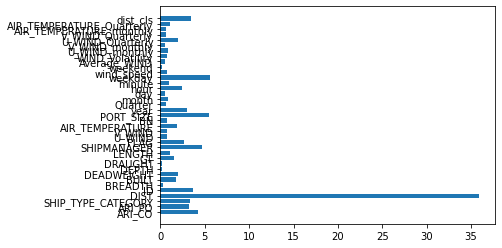

In [290]:
# 변수중요도 확인
plt.barh(X_train.columns, model.feature_importances_)

In [311]:
#test데이터 예측
x_test = test.drop(columns=['SAMPLE_ID', 'ATA'], axis=1)

pred_test=model.predict(x_test)
pred_test = [max(0, value) for value in pred_test]
pred_exp_test = np.expm1(pred_test)

In [312]:
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_test
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/log.csv", index=False)